In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def Gaussian(X, Mu, Sigma):
    '''
    X : NxD matrix
    Mu : Dx1 matrix
    Sigma : DxD matrix
    '''
    N, D = X.shape
    
    sub = (X-Mu.T)
    expo = -0.5*np.diag(np.dot(np.dot(sub, np.linalg.inv(Sigma)), sub.T))
    Nconst = 1/np.sqrt(np.linalg.det(2*np.pi*Sigma))
    return Nconst*np.exp(expo)

In [4]:
X = np.arange(-3.4,3.4,0.01).reshape(-1,1)
Mu = np.zeros((1,1))
Sigma_spike = np.ones((1,1))
Sigma_slab = np.ones((1,1))*100

In [5]:
X.shape, Mu.shape, Sigma_spike.shape, Sigma_slab.shape

((680, 1), (1, 1), (1, 1), (1, 1))

### Marginal Prior

In [6]:
v1 = Gaussian(X, Mu , Sigma_spike)
v2 = Gaussian(X, Mu , Sigma_slab)
mar_prior = 0.5*(v1 + v2)

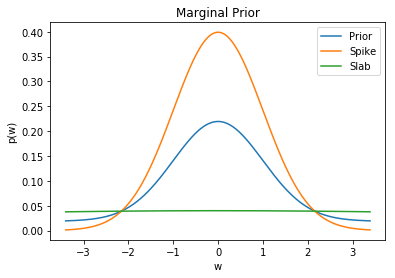

In [7]:
plt.plot(X, mar_prior, label = "Prior")
plt.plot(X, v1, label = "Spike")
plt.plot(X, v2, label = "Slab")
plt.legend()
plt.xlabel("w")
plt.ylabel("p(w)")
plt.title("Marginal Prior")
plt.savefig("01.png")
plt.show()

### Posterior of b

In [8]:
def get_posterior_term(sigmai,rho,x,pi):
    
    n = 1
    x_bar = x # 1xD
    
    v0 = n*(sigmai**2)+(rho**2)
    v1 = 1/np.sqrt(v0)
    v2 = (sigmai*n*x_bar)**2
    v3 = 2*v0*(rho**2)
    v4 = np.exp(v2/v3)
    v5 = v1*v4*pi
    return v5

In [9]:
rho_sqr = 0.01
b_pos_x  = []

for x in X:
    num = get_posterior_term(np.sqrt(Sigma_slab),np.sqrt(rho_sqr),x,0.5)
    deno = num + get_posterior_term(np.sqrt(Sigma_spike),np.sqrt(rho_sqr),x,0.5)
    b_pos = np.divide(num, deno)
    b_pos_x.append(b_pos[:,0])

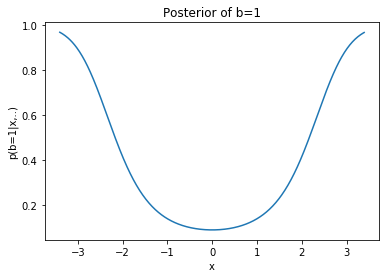

In [10]:
plt.plot(X[:,0],b_pos_x)
plt.xlabel("x")
plt.ylabel("p(b=1|x,..)")
plt.title("Posterior of b=1")
plt.savefig("02.png")
plt.show()

In [11]:
rho_sqr = 0.01
w_pos_x  = []

mu_1 = ((3*Sigma_spike)/(Sigma_spike + rho_sqr)).reshape(-1,1)
sig_1 = (((rho_sqr*Sigma_spike))/(Sigma_spike + rho_sqr)).reshape(1,1)
v1 = Gaussian(X+3, mu_1 , sig_1)

mu_2 = ((3*Sigma_slab)/(Sigma_slab + rho_sqr)).reshape(-1,1)
sig_2 = (((rho_sqr*Sigma_slab))/(Sigma_slab + rho_sqr)).reshape(1,1)
v2 = Gaussian(X+3, mu_2 , sig_2)

w_pos = 0.5*(v1+v2)

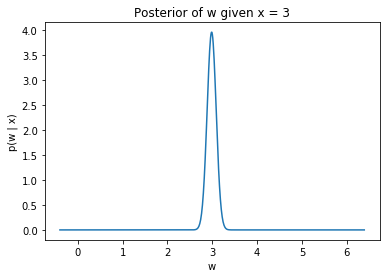

In [12]:
plt.plot(X+3, w_pos)
plt.xlabel("w")
plt.ylabel("p(w | x)")
plt.title("Posterior of w given x = 3")
plt.savefig("03.png")
plt.show()